In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


# Data Collection

In [3]:
amz=pd.read_csv(r'/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')
dis=pd.read_csv(r'/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv')
ntf=pd.read_csv(r'/kaggle/input/netflix-shows/netflix_titles.csv')

In [4]:
amz.info()
dis.info()
ntf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          

In [5]:
print("Platform: amazon\n")
print(amz.isnull().sum())
print("\nplatform: disney\n")
print(dis.isnull().sum())
print("\nplatform : netflix\n")
print(ntf.isnull().sum())


Platform: amazon

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

platform: disney

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

platform : netflix

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
amz['platform'] = 'Amazon'
dis['platform'] = 'Disney+ Hotstar'
ntf['platform'] = 'Netflix'

# Data cleaning and transformation

In [7]:
df = pd.concat([amz, dis, ntf], ignore_index=True)
df.drop_duplicates(subset=['title', 'director'], inplace=True)

df['director'].fillna(' ', inplace=True)
df['cast'].fillna(' ', inplace=True)
df['country'].fillna(' ', inplace=True)
df['date_added'].fillna(' ', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

/tmp/ipykernel_33/2622983894.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna(' ', inplace=True)
/tmp/ipykernel_33/2622983894.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

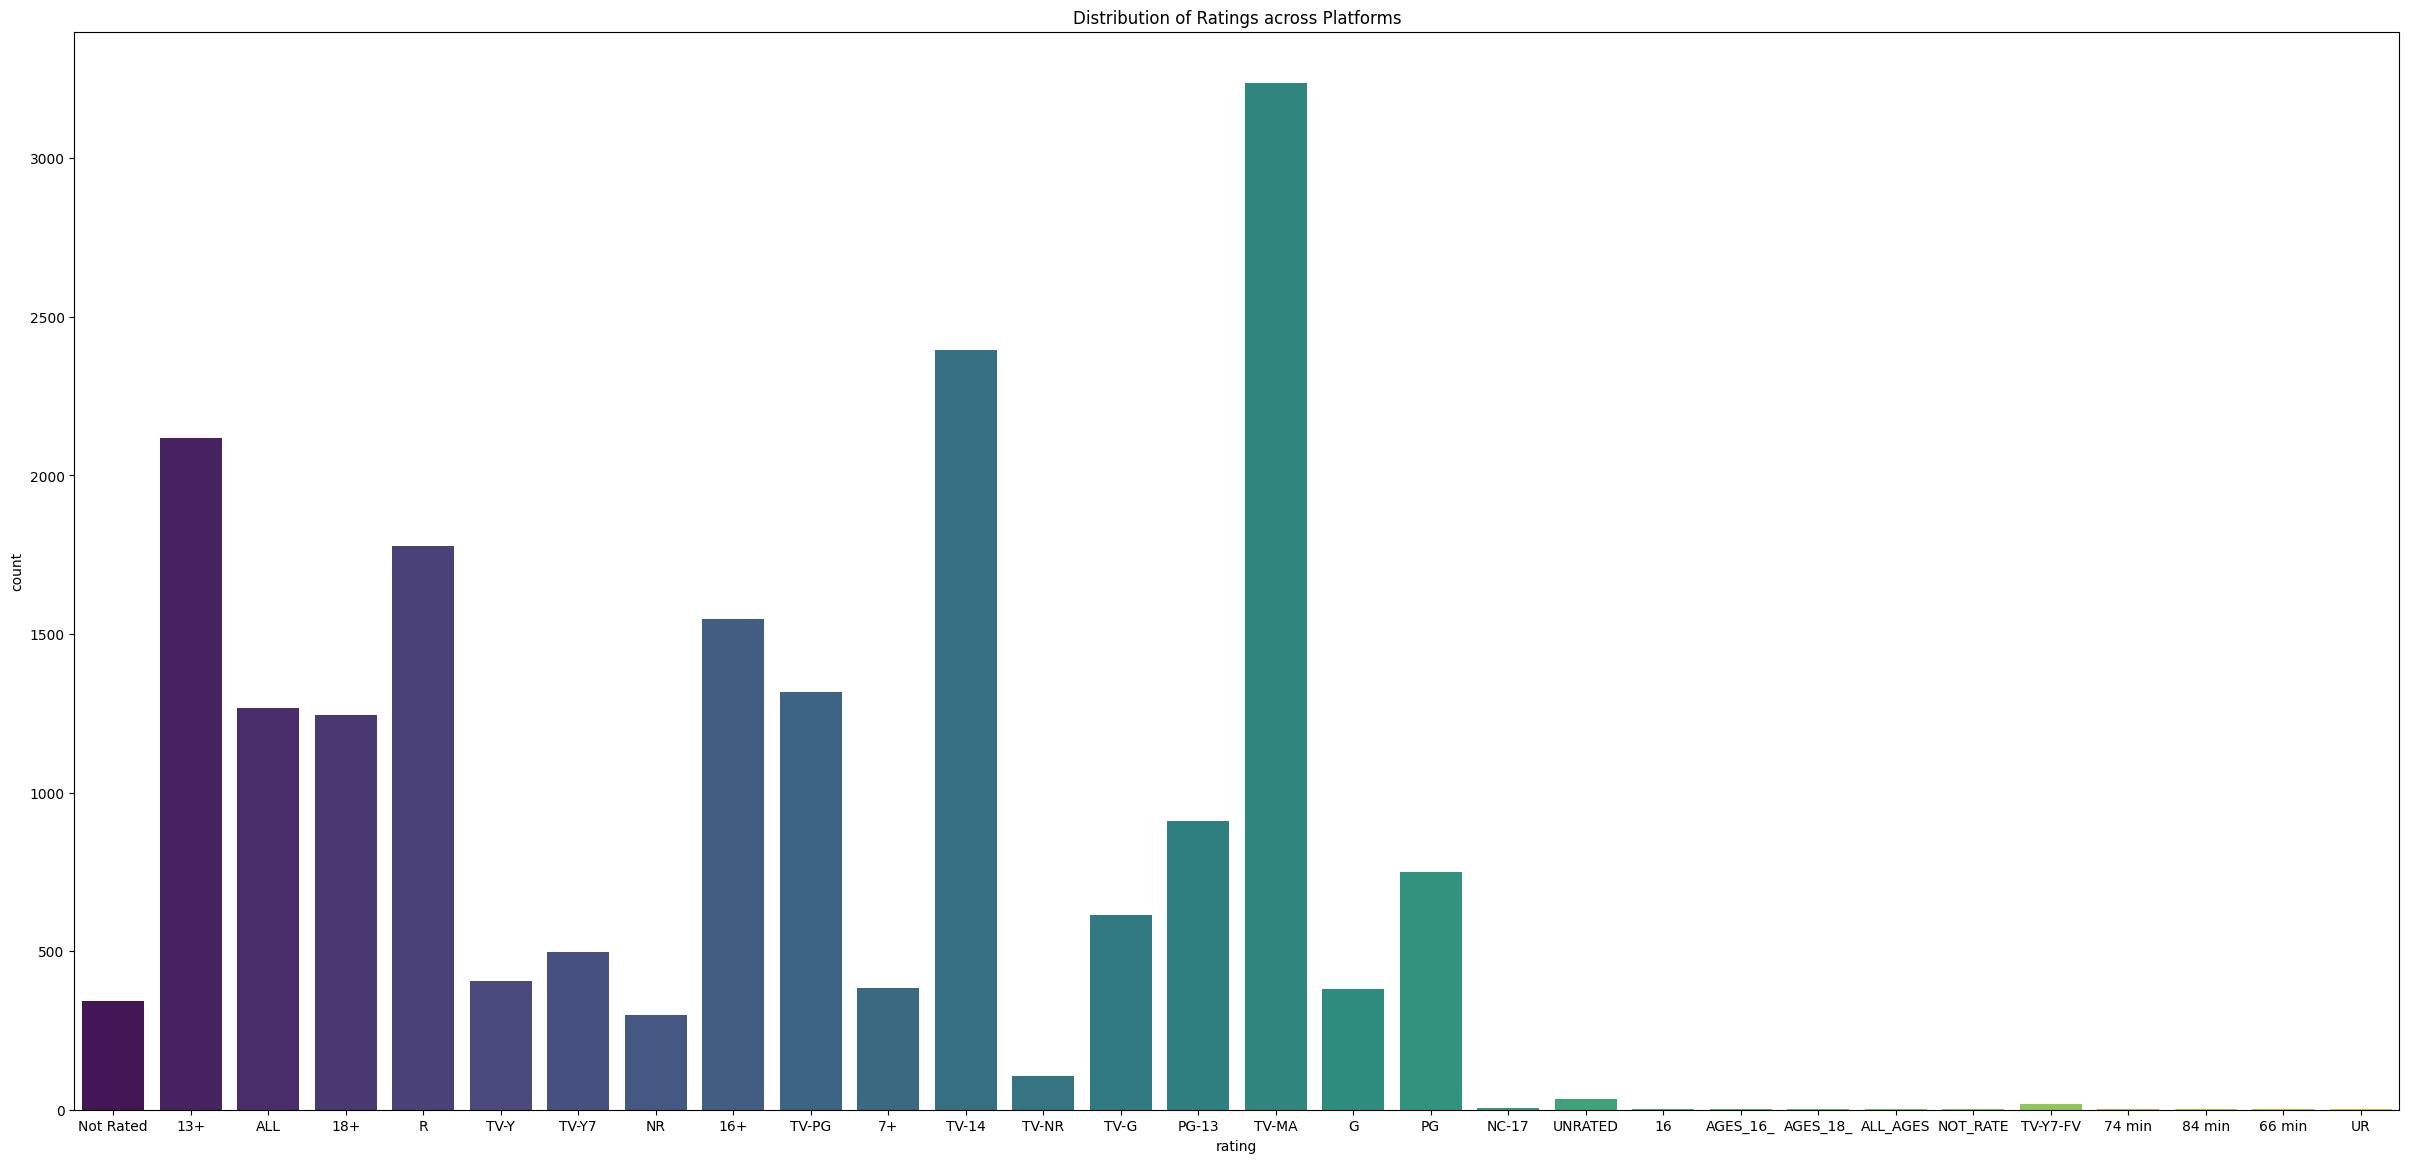

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


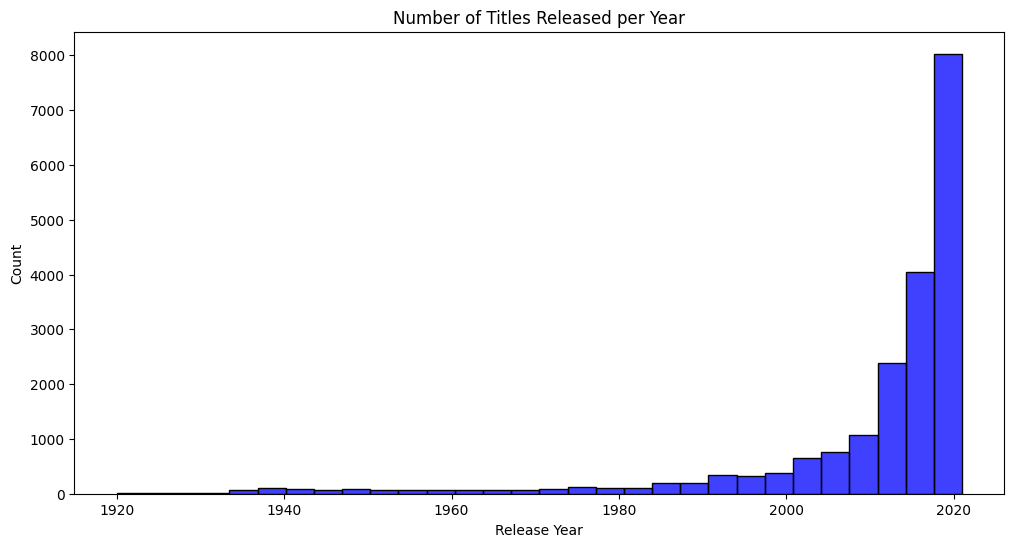

In [8]:
plt.figure(figsize=(30, 14))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings across Platforms')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=False, color='blue')
plt.title('Number of Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19670 entries, 0 to 19924
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       19670 non-null  object        
 1   type          19670 non-null  object        
 2   title         19670 non-null  object        
 3   director      19670 non-null  object        
 4   cast          19670 non-null  object        
 5   country       19670 non-null  object        
 6   date_added    10066 non-null  datetime64[ns]
 7   release_year  19670 non-null  int64         
 8   rating        19670 non-null  object        
 9   duration      19667 non-null  object        
 10  listed_in     19670 non-null  object        
 11  description   19670 non-null  object        
 12  platform      19670 non-null  object        
 13  year_added    10066 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 2.3+ MB


In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,year_added
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,Not Rated,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon,2021.0
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon,2021.0
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,Not Rated,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon,2021.0
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,Not Rated,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon,2021.0
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,Not Rated,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon,2021.0


In [11]:
for column in ["show_id","title","rating"]:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Number of Total values: {len(df)}")
    print(f"Number of distinct values: {len(unique_values)}")
    print(unique_values)
    print("\n" + "="*50 + "\n")


Column: show_id
Number of Total values: 19670
Number of distinct values: 9668
['s1' 's2' 's3' ... 's9666' 's9667' 's9668']


Column: title
Number of Total values: 19670
Number of distinct values: 19478
['The Grand Seduction' 'Take Care Good Night' 'Secrets of Deception' ...
 'Zombieland' 'Zoom' 'Zubaan']


Column: rating
Number of Total values: 19670
Number of distinct values: 30
['Not Rated' '13+' 'ALL' '18+' 'R' 'TV-Y' 'TV-Y7' 'NR' '16+' 'TV-PG' '7+'
 'TV-14' 'TV-NR' 'TV-G' 'PG-13' 'TV-MA' 'G' 'PG' 'NC-17' 'UNRATED' '16'
 'AGES_16_' 'AGES_18_' 'ALL_AGES' 'NOT_RATE' 'TV-Y7-FV' '74 min' '84 min'
 '66 min' 'UR']




In [12]:
df['show_id'] = df.index.to_series().apply(lambda x: f's{x}')
column='show_id'
unique_values = df[column].unique()
print(f"Column: {column}")
print(f"Number of Total values: {len(df)}")
print(f"Number of distinct values: {len(unique_values)}")
print(unique_values)
print("\n" + "="*50 + "\n")

Column: show_id
Number of Total values: 19670
Number of distinct values: 19670
['s0' 's1' 's2' ... 's19922' 's19923' 's19924']




In [13]:
df2=pd.DataFrame({'show_id':df['show_id'],'title':df['title'],'listed_in':df['listed_in']})
df2['listed_in'] = df2['listed_in'].apply(lambda x: x.split(', '))
df2.head()

,show_id,title,listed_in
0,s0,The Grand Seduction,"[Comedy, Drama]"
1,s1,Take Care Good Night,"[Drama, International]"
2,s2,Secrets of Deception,"[Action, Drama, Suspense]"
3,s3,Pink: Staying True,[Documentary]
4,s4,Monster Maker,"[Drama, Fantasy]"


In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,year_added
0,s0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,Not Rated,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon,2021.0
1,s1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon,2021.0
2,s2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,Not Rated,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon,2021.0
3,s3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,Not Rated,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon,2021.0
4,s4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,Not Rated,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon,2021.0


In [15]:
df['year_added'] = df['year_added'].fillna(0).astype(int)

In [16]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,year_added
19920,s19920,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix,2019
19921,s19921,TV Show,Zombie Dumb,,,,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix,2019
19922,s19922,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix,2019
19923,s19923,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix,2020
19924,s19924,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Netflix,2019


In [17]:
df['rating'].replace({'74 min': 'NR', '66 min': 'NR', '84 min': 'NR'}, inplace=True)

rating_mapping = {
    'G': 'G',
    'TV-G': 'G',
    'PG': 'PG',
    'TV-PG': 'PG',
    'PG-13': 'PG-13',
    'TV-14': 'PG-13',
    'R': 'R',
    'TV-MA': 'R',
    'NC-17': 'NC-17',
    '13+': 'PG-13',
    '16+': 'R',
    '18+': 'R',
    'NR': 'NR',
    'UNRATED': 'NR',
    'UR': 'NR',
    'NOT_RATE': 'NR',
    'TV-NR': 'NR',
    'ALL': 'G',
    'ALL_AGES': 'G',
    'AGES_16_': 'R',
    'AGES_18_': 'R',
    '7+': 'PG',
    'TV-Y7': 'PG',
    'TV-Y7-FV': 'PG',
    'TV-Y': 'G',
}

df['rating'] = df['rating'].map(rating_mapping)

print(df['rating'].value_counts())


rating
R        7810
PG-13    5424
PG       2967
G        2671
NR        447
NC-17       6
Name: count, dtype: int64


/tmp/ipykernel_33/1442220998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace({'74 min': 'NR', '66 min': 'NR', '84 min': 'NR'}, inplace=True)


In [18]:
for column in ['show_id','type','title','rating','duration']:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Number of Total values: {len(df)}")
    print(f"Number of distinct values: {len(unique_values)}")
    print(unique_values)
    print("\n" + "="*50 + "\n")

Column: show_id
Number of Total values: 19670
Number of distinct values: 19670
['s0' 's1' 's2' ... 's19922' 's19923' 's19924']


Column: type
Number of Total values: 19670
Number of distinct values: 2
['Movie' 'TV Show']


Column: title
Number of Total values: 19670
Number of distinct values: 19478
['The Grand Seduction' 'Take Care Good Night' 'Secrets of Deception' ...
 'Zombieland' 'Zoom' 'Zubaan']


Column: rating
Number of Total values: 19670
Number of distinct values: 7
[nan 'PG-13' 'G' 'R' 'PG' 'NR' 'NC-17']


Column: duration
Number of Total values: 19670
Number of distinct values: 247
['113 min' '110 min' '74 min' '69 min' '45 min' '52 min' '98 min'
 '131 min' '87 min' '92 min' '88 min' '93 min' '94 min' '46 min' '96 min'
 '1 Season' '104 min' '62 min' '50 min' '3 Seasons' '2 Seasons' '86 min'
 '36 min' '37 min' '103 min' '9 min' '18 min' '14 min' '20 min' '19 min'
 '22 min' '60 min' '6 min' '54 min' '5 min' '84 min' '126 min' '125 min'
 '109 min' '89 min' '85 min' '56 min' '40

In [19]:
df.drop(columns=['date_added'], inplace=True)

In [20]:
df['country'] = df['country'].apply(lambda x: x.strip().title() if pd.notnull(x) else x)
column='country'
unique_values = df[column].unique()
print(f"Column: {column}")
print(f"Number of Total values: {len(df)}")
print(f"Number of distinct values: {len(unique_values)}")
print(unique_values)

Column: country
Number of Total values: 19670
Number of distinct values: 802
['Canada' 'India' 'United States' 'United Kingdom' 'France' 'Spain' ''
 'Italy' 'United Kingdom, France' 'United States, Italy'
 'United States, India' 'United Kingdom, United States'
 'United States, United Kingdom, Germany' 'Japan'
 'China, United States, United Kingdom'
 'Denmark, United Kingdom, Czech Republic, Netherlands'
 'United States, Ireland' 'United States, United Kingdom, Canada'
 'United Kingdom, United States, India' 'United Kingdom, India'
 'United States, China' 'Canada, United States' 'United States, Thailand'
 'Brazil, United States, India' 'Switzerland, India'
 'United Kingdom, Canada, United States' 'Germany' 'Australia' 'Belgium'
 'Chile, Argentina, United States' 'Mexico'
 'Denmark, Sweden, United States' 'Netherlands'
 'United States, United Kingdom' 'New Zealand' 'United States, Portugal'
 'United States, France' 'Canada, United States, Brazil'
 'France, United States' 'India, United S

In [21]:
df2['country'] = df['country'].apply(lambda x: x.split(', '))
df2['cast'] = df['cast'].apply(lambda x: x.split(', '))
df2.head()

,show_id,title,listed_in,country,cast
0,s0,The Grand Seduction,"[Comedy, Drama]",[Canada],"[Brendan Gleeson, Taylor Kitsch, Gordon Pinsent]"
1,s1,Take Care Good Night,"[Drama, International]",[India],"[Mahesh Manjrekar, Abhay Mahajan, Sachin Khede..."
2,s2,Secrets of Deception,"[Action, Drama, Suspense]",[United States],"[Tom Sizemore, Lorenzo Lamas, Robert LaSardo, ..."
3,s3,Pink: Staying True,[Documentary],[United States],"[Interviews with: Pink, Adele, Beyoncé, Britne..."
4,s4,Monster Maker,"[Drama, Fantasy]",[United Kingdom],"[Harry Dean Stanton, Kieran O'Brien, George Co..."


In [22]:
df['rating'].fillna('NR', inplace=True)
print(df['rating'].value_counts())

rating
R        7810
PG-13    5424
PG       2967
G        2671
NR        792
NC-17       6
Name: count, dtype: int64


/tmp/ipykernel_33/4077329214.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('NR', inplace=True)


In [23]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,platform,year_added
0,s0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,NR,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon,2021
1,s1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,PG-13,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon,2021
2,s2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2017,NR,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon,2021
3,s3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2014,NR,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon,2021
4,s4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,NR,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon,2021


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19670 entries, 0 to 19924
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19670 non-null  object
 1   type          19670 non-null  object
 2   title         19670 non-null  object
 3   director      19670 non-null  object
 4   cast          19670 non-null  object
 5   country       19670 non-null  object
 6   release_year  19670 non-null  int64 
 7   rating        19670 non-null  object
 8   duration      19667 non-null  object
 9   listed_in     19670 non-null  object
 10  description   19670 non-null  object
 11  platform      19670 non-null  object
 12  year_added    19670 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 2.1+ MB


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19670 entries, 0 to 19924
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   show_id    19670 non-null  object
 1   title      19670 non-null  object
 2   listed_in  19670 non-null  object
 3   country    19670 non-null  object
 4   cast       19670 non-null  object
dtypes: object(5)
memory usage: 922.0+ KB


# Model Creation

In [26]:
df2 = df2.merge(df[['show_id', 'director', 'description']], on='show_id', how='left')

df2['director'].fillna('Unknown', inplace=True)
df2['description'].fillna('', inplace=True)


/tmp/ipykernel_33/2338286556.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['director'].fillna('Unknown', inplace=True)
/tmp/ipykernel_33/2338286556.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [27]:
def combine_features(row):
    director = row['director'] if isinstance(row['director'], str) else ''
    description = row['description'] if isinstance(row['description'], str) else ''
    cast = ', '.join(row['cast']) if isinstance(row['cast'], list) else ''
    country = ', '.join(row['country']) if isinstance(row['country'], list) else ''
    listed_in = ', '.join(row['listed_in']) if isinstance(row['listed_in'], list) else ''
    return f"{director} {cast} {country} {listed_in} {description}"

df2['combined_features'] = df2.apply(combine_features, axis=1)


In [28]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['combined_features'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [29]:
def recommend_movies(title, df_combined=df2, cosine_sim=cosine_sim):
    title =recommend_movies_fuzzy(title)
    idx = df_combined.index[df_combined['title'] == title].tolist()
    
    if not idx:
        return "Show not found."
    
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:6]

    show_indices = [i[0] for i in sim_scores]

    return df_combined.iloc[show_indices]['show_id'].tolist()

In [30]:
from fuzzywuzzy import process

def recommend_movies_fuzzy(title,df_combined=df2, cosine_sim=cosine_sim):
    titles = df['title'].tolist()
    closest_match = process.extractOne(title, titles)
    if closest_match is None:
        return "Movie not found."
    
    title = closest_match[0]
    
    return title


/opt/conda/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [31]:
def get_movie_details(show_id_list, df=df):
    detailed_info_list = []

    for show_id in show_id_list:
        print(f"Processing show_id: {show_id}")
        movie_info = df[df['show_id'] == show_id]
        
        if not movie_info.empty:
            movie_info = movie_info.iloc[0]
            movie_details = {
                'Title': movie_info['title'],
                'Director': movie_info['director'],
                'Cast': movie_info['cast'],
                'Country': movie_info['country'],
                'Release Year': movie_info['release_year'],
                'Rating': movie_info['rating'],
                'Duration': movie_info['duration'],
                'Listed In': movie_info['listed_in'],
                'Platform': movie_info['platform'],
                'Description': movie_info['description'] if movie_info['description'].strip() else 'No description available'
            }
        else:
            movie_details = {
                'Title': 'Not Found',
                'Director': 'Not Found',
                'Cast': 'Not Found',
                'Country': 'Not Found',
                'Release Year': 'Not Found',
                'Rating': 'Not Found',
                'Duration': 'Not Found',
                'Listed In': 'Not Found',
                'Platform': 'Not Found',
                'Description': f"show_id {show_id} not found in the DataFrame."
            }
        
        detailed_info_list.append(movie_details)

    detailed_info = pd.DataFrame(detailed_info_list)
    
    pd.set_option('display.max_colwidth', None)  # To display the full description
    return detailed_info


In [36]:
def movie_details(title, df=df):
    title = title.strip().title()
    title =recommend_movies_fuzzy(title)
    movie_info = df[df['title'].str.title() == title]
    
    if movie_info.empty:
        print(f"Movie or show with this title not found.")
    else:
        for index, row in movie_info.iterrows():
            print(f"Show ID: {row['show_id']}")
            print(f"Title: {row['title']}")
            print(f"Type: {row['type']}")
            print(f"Director: {row['director']}")
            print(f"Cast: {', '.join(row['cast'])}")
            print(f"Country: {', '.join(row['country'])}")
            print(f"Release Year: {row['release_year']}")
            print(f"Rating: {row['rating']}")
            print(f"Duration: {row['duration']}")
            print(f"Listed In: {', '.join(row['listed_in'])}")
            print(f"Platform: {row['platform']}")
            print(f"Description: {row['description'] if row['description'].strip() else 'No description available'}")
            print("\n" + "-"*40 + "\n")


# Model Testing

In [33]:
show_name='stranger things'
recommendations=recommend_movies(show_name,df2, cosine_sim)
movie_details_df = get_movie_details(recommendations)

Processing show_id: s16318
Processing show_id: s12245
Processing show_id: s13308
Processing show_id: s4251
Processing show_id: s17285


In [34]:
movie_details_df

,Title,Director,Cast,Country,Release Year,Rating,Duration,Listed In,Platform,Description
0,Beyond Stranger Things,,"Jim Rash, Matt Duffer, Ross Duffer, Shawn Levy, David Harbour, Finn Wolfhard, Millie Bobby Brown, Gaten Matarazzo, Caleb McLaughlin, Natalia Dyer, Charlie Heaton, Noah Schnapp, Joe Keery, Dacre Montgomery, Sadie Sink, Paul Reiser, Sean Astin, Randy Havens, Brett Gelman, Linnea Berthelsen",United States,2017,PG-13,1 Season,"Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy",Netflix,"Secrets from the ""Stranger Things 2"" universe are revealed as cast and guests discuss the latest episodes with host Jim Rash. Caution: spoilers ahead!"
1,Prank Encounters,,Gaten Matarazzo,United States,2021,R,2 Seasons,"Reality TV, TV Comedies, TV Horror",Netflix,Monstrous frights meet hilarious reveals on this hidden-camera prank show as real people become the stars of their own full-blown horror movie.
2,The Umbrella Academy,,,"United States, Canada",2020,PG-13,2 Seasons,"TV Action & Adventure, TV Mysteries, TV Sci-Fi & Fantasy",Netflix,"Reunited by their father's death, estranged siblings with extraordinary powers uncover shocking family secrets – and a looming threat to humanity."
3,Heathers,Michael Lehmann,"Winona Ryder, Christian Slater",,1989,R,103 min,Comedy,Amazon,"Winona Ryder, Christian Slater and Shannen Doherty star in this cruelly hilarious dark comedy. which became one of the biggest cult classics of the 80."
4,Anjaan: Special Crimes Unit,,"Gashmeer Mahajani, Heena Parmar",India,2018,PG-13,1 Season,"International TV Shows, TV Horror, TV Mysteries",Netflix,"The cases are supernatural; the police officers human. Together, cops Aditi and Vikrant must solve mysteries from the realm of the paranormal."


In [40]:
show_name='The vampire Diaries'
recommendations=recommend_movies(show_name,df2, cosine_sim)
movie_details_df = get_movie_details(recommendations)

Processing show_id: s15827
Processing show_id: s13308
Processing show_id: s13464
Processing show_id: s8708
Processing show_id: s8726


In [41]:
movie_details_df

,Title,Director,Cast,Country,Release Year,Rating,Duration,Listed In,Platform,Description
0,The Originals,,"Joseph Morgan, Daniel Gillies, Phoebe Tonkin, Charles Michael Davis, Leah Pipes, Danielle Campbell, Claire Holt, Steven Krueger",United States,2018,PG-13,5 Seasons,"TV Dramas, TV Horror, TV Mysteries",Netflix,"The Mikaelsons move to New Orleans and form an alliance with local witches in an effort to rule the city once again in this ""Vampire Diaries"" spinoff."
1,The Umbrella Academy,,,"United States, Canada",2020,PG-13,2 Seasons,"TV Action & Adventure, TV Mysteries, TV Sci-Fi & Fantasy",Netflix,"Reunited by their father's death, estranged siblings with extraordinary powers uncover shocking family secrets – and a looming threat to humanity."
2,"Roswell, New Mexico",,"Jeanine Mason, Nathan Parsons, Michael Vlamis, Lily Cowles, Tyler Blackburn, Heather Hemmens, Michael Trevino, Trevor St. John",United States,2020,PG-13,2 Seasons,"Classic & Cult TV, TV Dramas, TV Sci-Fi & Fantasy",Netflix,"After 10 years, a woman returns to her sleepy tourist-occupied hometown and discovers her high-school crush is also an unusual foreigner."
3,Clip: ACT 2 - Series 5,,1,,2021,G,1 Season,TV Shows,Amazon,1
4,Act 5 - Series 2,,1,,2021,G,1 Season,TV Shows,Amazon,2


In [45]:
show_name='Squid Game'
recommendations=recommend_movies(show_name,df2, cosine_sim)
movie_details_df = get_movie_details(recommendations)

Processing show_id: s16183
Processing show_id: s11849
Processing show_id: s11804
Processing show_id: s14406
Processing show_id: s16553


In [46]:
movie_details_df

,Title,Director,Cast,Country,Release Year,Rating,Duration,Listed In,Platform,Description
0,Prison Playbook,,"Hae-soo Park, Kyung-ho Jung, Dong-il Sung, Krystal Jung, Soo-jeong Ye, Jae-sung Jung, Hoon-jin Lee, Kyoo-hyung Lee, Ho-cheol Lee, Chang-hwan Ahn, Kyung-nam Kim",South Korea,2017,R,1 Season,"International TV Shows, Korean TV Shows, TV Comedies",Netflix,"With his major league baseball debut right around the corner, a star pitcher lands in prison and must learn to navigate his new world."
1,Love (ft. Marriage and Divorce),,"Sung Hoon, Lee Tae-gon, Park Joo-mi, Lee Ga-ryoung, Lee Min-young, Jeon No-min, Jeon Soo-kyeong, Lim Hye-young, Song Ji-in, Moon Sung-ho, Roh Joo-hyun, Kim Ameliia, Kim Eung-soo, Lee Jong-nam, Lee Hyo-chun, Jun Hye-won, Lim Han-bin, Park Seo-kyung, Shin Su-ho, Yun Seo-hyun",South Korea,2021,PG-13,2 Seasons,"International TV Shows, TV Dramas",Netflix,"Everything comes unraveling for three successful women who work on a radio show as twists, turns and troubles plague their seemingly happy marriages."
2,Hospital Playlist,,"Cho Jung-seok, Yoo Yeon-seok, Jung Kyung-ho, Kim Dae-myeong, Jeon Mi-do, Kim Hae-suk, Kim Kap-soo, Jung Moon-sung",South Korea,2021,PG-13,2 Seasons,"International TV Shows, Korean TV Shows, TV Comedies",Netflix,"Every day is extraordinary for five doctors and their patients inside a hospital, where birth, death and everything in between coexist."
3,Chief of Staff,,"Lee Jung-jae, Shin Mina, Lee Elijah, Kim Dong-jun, Jung Jin-young, Kim Kap-soo, Jung Woong-in, Im Won-hee, Kim Hong-pa",South Korea,2019,PG-13,2 Seasons,"International TV Shows, Korean TV Shows, TV Dramas",Netflix,"As a chief of staff in the National Assembly, Jang Tae-jun influences power behind the scenes while pursuing his own ambitions to rise to the top."
4,Man to Man,Chang-Min Lee,"Hae-Jin Park, Sung-woong Park, Min-jung Kim, Jung-an Chae, Jung-hoon Yeon, Hyun-sung Jang, Man-sik Jung, Shin-il Kang, Ho-jin Chun, In-ho Tae",South Korea,2017,PG-13,1 Season,"Crime TV Shows, International TV Shows, Korean TV Shows",Netflix,"Disguised as a bodyguard, a special agent must complete his national secret tasks while pandering to the whims of his ill-tempered world star."


In [47]:
show_name='Enchanted'
recommendations=recommend_movies(show_name,df2, cosine_sim)
movie_details_df = get_movie_details(recommendations)

Processing show_id: s10156
Processing show_id: s9689
Processing show_id: s10775
Processing show_id: s10571
Processing show_id: s10272


In [48]:
movie_details_df

,Title,Director,Cast,Country,Release Year,Rating,Duration,Listed In,Platform,Description
0,Into the Unknown: Making Frozen 2,,"Kristen Bell, Idina Menzel, Josh Gad, Jonathan Groff, Jennifer Lee, Chris Buck",United States,2020,PG,1 Season,"Docuseries, Family",Disney+ Hotstar,"For the first time, go behind-the-scenes into the making of the #1 animated film, Frozen 2."
1,Frozen Fever,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Jonathan Groff, Josh Gad, Santino Fontana, Chris Williams",United States,2015,G,11 min,"Animation, Family, Fantasy",Disney+ Hotstar,Elsa wants to give Anna the best birthday party ever.
2,Olaf's Frozen Adventure,"Stevie Wermers-Skelton, Kevin Deters","Josh Gad, Idina Menzel, Kristen Bell, Jonathan Groff, Chris Williams, John de Lancie",United States,2017,G,25 min,"Animation, Comedy, Family",Disney+ Hotstar,Olaf and Sven set out to save Christmas for Anna and Elsa.
3,Frozen,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Jonathan Groff, Josh Gad, Santino Fontana, Alan Tudyk",United States,2013,PG,105 min,"Animation, Family, Fantasy",Disney+ Hotstar,"Anna and Kristoff brave the elements, racing to save Elsa and the kingdom."
4,Frozen 2,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Josh Gad, Jonathan Groff, Sterling Brown, Evan Wood",United States,2019,PG,107 min,"Action-Adventure, Animation, Family",Disney+ Hotstar,Elsa journeys into the unknown to uncover truths about the past.
